# Algorithm Optimization problems

## Exercise 3: Implementing a KNN Algorithm with Scikit-learn

In this exercise, we will have a brief introduction to the Scikit-learn library. We will see how this library can be used to implement the KNN algorithm in less than 20 lines of code.  Then the task will be to try to optimize the parameter of this algorithm. Don't worry! Scikit-Learn, and also de KNN algorithm will be explained very well in future modules.

**The dataset**

We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The goal is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.


**Library installation**


First let's install the Scikit-learn library by entering the following command in the terminal:

```py
pip install -U scikit-learn
```

Now let's see how to implement the KNN algorithm:

**Importing libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing and loading the dataset**

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

**Looking at the first rows of the data**

In [7]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Pre-processing**

Split dataset into attributes and labels. Again, don't worry, this data preprocessing part will also be very well explained in a future module. Now, we will focus on the algorithm optimization.

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

**Train Test split**

In machine learning, when we are building a model, we have to be careful to do not overfit it. Overfitting means that our model works very well in known data but when it works with unseen data, it has a poor performance. To avoid this, we divide our dataset into training and test datasets. This way our algorithm is tested on un-seen data to evaluate the performance of our algorithm. We will divide it into 80% training data and 20% for testing. This 4 blocks of data would be:

-X_train: training features

-X_test: test features

-y_train: training labels

-y_test: test labels

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Feature Scaling**

The majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

It is a good practice to scale the features so that all of them can be uniformly evaluated.
We will read more about feature scaling in the data preprocessing module, but now, let's have a first look at how it is implemented.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Train the KNN algorithm**

Now our data is ready for training. We will begin by importing the algorithm we want to train from the scikit-learn library, and then we will initialize it with one parameter: n_neigbours. This is basically the value for 'K'. We don't know what is the ideal number of neighbors(K) yet so we will start it with 5. After making the predictions we will try to otpimize this K value.

Finally, we train our model using .fit on our training features and training labels (they both represent 80% of the data).

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Make predictions on our test data**

The model has been trained, so now we use the same algorithm (stored in the 'classifier' variable)  to predict only on the features of the test dataset (20% of the data). This time we don't use the labels, because we want to predict them, and then compare them with the real test labels.

In [12]:
y_pred = classifier.predict(X_test)

**Evaluate the algorithm**

Confusion matrix, precision, recall and f1 score are the most commonly used evaluation metrics for classification problems.
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Here we will compare our y_pred results versus our y_test true labels.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Optimizing the KNN algorithm**

There is no way to know beforehand which value of 'K' yields the best results since the beginning. We randomly chose 5 as the 'K' value.

This is where we optimize our algorithm. To help find the best value of K:

1. First create a function that calculates the mean of error for all the predicted values where K ranges from 1 to 40. 
2. Plot the error values against K values.
3. Vary the test and training size along with the K value to see how your results differ and how can you improve the accuracy of your algorithm. 



In [14]:
# Create an empty error list.

error = []

# Calculating error for K values between 1 and 40
# Execute a loop from 1 to 40. In each iteration calculate the mean error for predicted values of test set

#for i in range(1, 40): (uncomment this line)
    #initialize the KNN algorithm
   

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)  #fit the train data
    pred_i = knn.predict(X_test) #make predictions
    error.append(np.mean(pred_i != y_test)) #append the result to the error list.


Text(0, 0.5, 'Mean Error')

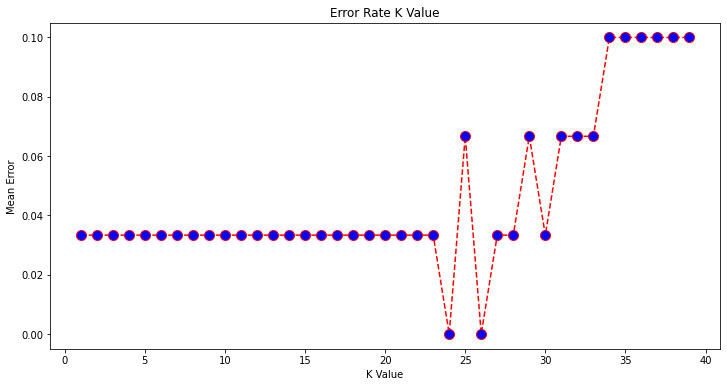

In [15]:
# plot the error values against K values. Establish the graph size.

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

# title and labels (uncomment the following code lines)
plt.title('Error Rate K Value') #plt.title('Error Rate K Value')
plt.xlabel('K Value') #plt.xlabel('K Value')
plt.ylabel('Mean Error') #plt.ylabel('Mean Error')

Source:

https://www.geeksforgeeks.org/

https://stackabuse.com/big-o-notation-and-algorithm-analysis-with-python-examples/

https://stackabuse.com/quicksort-in-python/

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/